<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Sampling_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
education_counts_pop <- attrition_pop %>% 
  # Count the employees by Education level, sorting by n
  count(Education, sort = TRUE) %>% 
  # Add a percent column
  mutate(percent = 100 * n / sum(n))

# See the results
education_counts_pop

In [ ]:
# From previous steps
attrition_pop %>% 
  count(Education, sort = TRUE) %>% 
  mutate(percent = 100 * n / sum(n))

attrition_strat <- attrition_pop %>% 
  group_by(Education) %>% 
  slice_sample(prop = 0.4) %>% 
  ungroup()

# Get the counts and percents from attrition_strat
education_counts_strat <- attrition_strat %>%
  count(Education, sort = TRUE) %>%
  mutate(percent = 100 * n / sum(n))

# See the results
education_counts_strat

In [ ]:
# From previous step
job_roles_pop <- unique(attrition_pop$JobRole)
job_roles_samp <- sample(job_roles_pop, size = 4)

# Filter for rows where JobRole is in job_roles_samp
attrition_filtered <- attrition_pop %>% 
  filter(JobRole %in% job_roles_samp)

# Randomly sample 10 employees from each sampled job role
attrition_clus <- attrition_filtered %>% 
  group_by(JobRole) %>% 
  slice_sample(n = 10)

# See the result
attrition_clus

In [ ]:
# Get unique values of RelationshipSatisfaction
satisfaction_unique <- unique(attrition_pop$RelationshipSatisfaction)

# Randomly sample for 2 of the unique satisfaction values
satisfaction_samp <- sample(satisfaction_unique, size = 2)

# Perform cluster sampling on the selected group 
# getting 0.25 of the population
attrition_strat <- attrition_pop %>%
  filter(RelationshipSatisfaction %in% satisfaction_samp) %>% 
  group_by(RelationshipSatisfaction) %>% 
  slice_sample(n = nrow(attrition_pop) / 4) %>% 
  ungroup()

In [ ]:
# Generate a simple random sample of 10 rows 
attrition_srs10 <- attrition_pop %>% 
  slice_sample(n = 10)

# Calculate the proportion of employee attrition in the sample
mean_attrition_srs10 <- attrition_srs10 %>% 
  summarize(mean_attrition = mean(Attrition == "Yes")) %>% 
  pull(mean_attrition)

# Calculate the relative error percentage
rel_error_pct10 <- 100 * abs(mean_attrition_pop - mean_attrition_srs10) / mean_attrition_pop

# See the result
rel_error_pct10

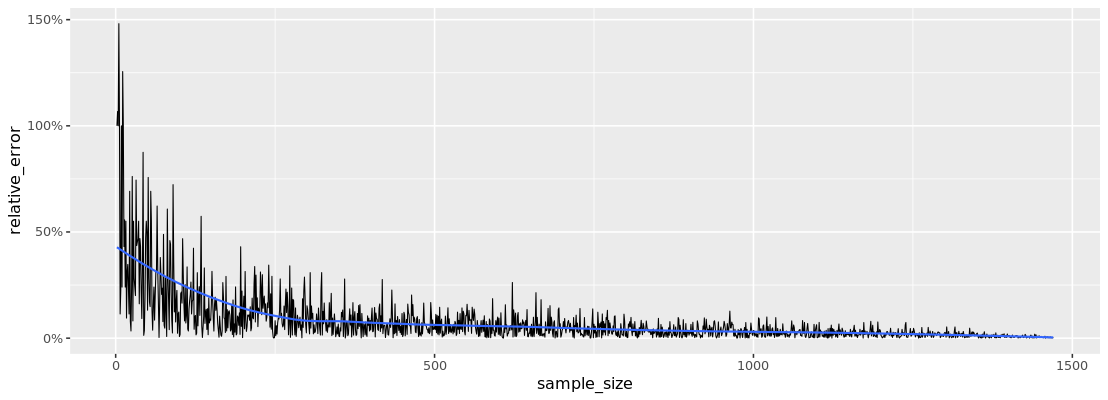

In [ ]:
# From previous step
mean_attritions <- replicate(
  n = 500,
  attrition_pop %>% 
    slice_sample(n = 20) %>% 
    summarize(mean_attrition = mean(Attrition == "Yes")) %>% 
    pull(mean_attrition)
)

# Store mean_attritions in a tibble in a column named sample_mean
sample_means <- tibble(
  sample_mean = mean_attritions
)

# Plot a histogram of the `sample_mean` column, binwidth 0.05
ggplot(sample_means, aes(x = sample_mean)) +
  geom_histogram(binwidth = 0.05)

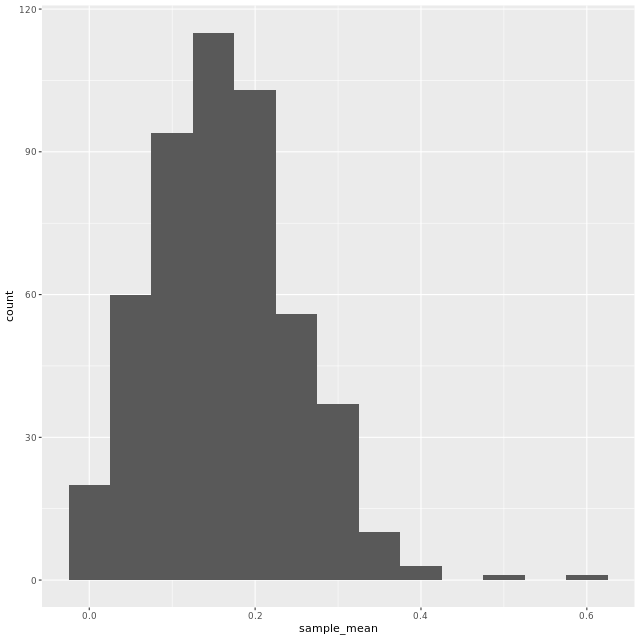

In [ ]:
# Replicate this 1000 times
mean_danceability_1000 <- replicate(
  1000,
  expr = {
    spotify_1_resample <- spotify_sample %>% 
      slice_sample(prop = 1, replace = TRUE)
    spotify_1_resample %>% 
      summarize(mean_danceability = mean(danceability)) %>% 
      pull(mean_danceability)
  }
)

# See the result
mean_danceability_1000

In [ ]:
# From previous steps
mean_danceability_1000 <- load_step_4()

# Store the resamples in a tibble
bootstrap_distn <- tibble(
  resample_mean = mean_danceability_1000
)

# Draw a histogram of the resample means with binwidth 0.002
ggplot(bootstrap_distn, aes(x = resample_mean)) + 
  geom_histogram(binwidth = 0.002)


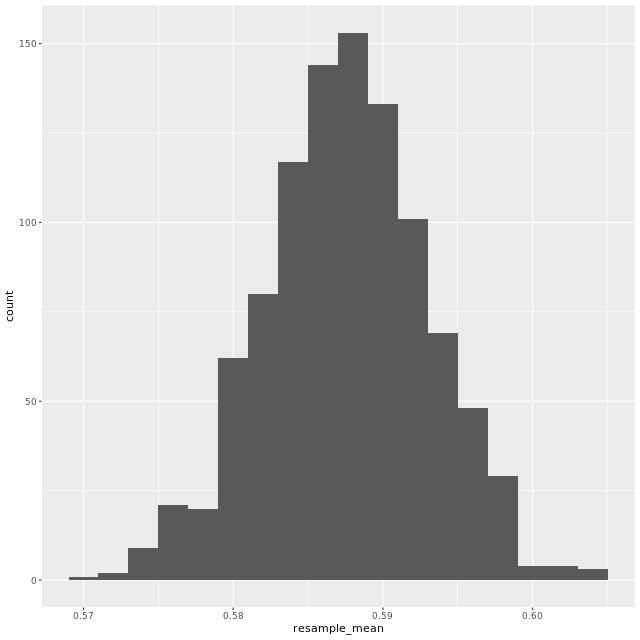

In [ ]:
# Generate a sampling distribution
mean_popularity_2000_samp <- replicate(
  # Use 2000 replicates
  2000,
  expr = {
    # Start with the population
    spotify_population %>% 
      # Sample 500 rows without replacement
      slice_sample(n = 500, replace = FALSE) %>% 
      # Calculate the mean popularity as mean_popularity
      summarize(mean_popularity = mean(popularity)) %>% 
      # Pull out the mean popularity
      pull(mean_popularity)
  }
)

# See the result
mean_popularity_2000_samp

In [ ]:
# Generate a bootstrap distribution
mean_popularity_2000_boot <- replicate(
  # Use 2000 replicates
  n = 2000,
  expr = {
    # Start with the sample
    spotify_sample %>% 
      # Sample same number of rows with replacement
      slice_sample(prop = 1, replace = TRUE) %>% 
      # Calculate the mean popularity
      summarize(mean_popularity = mean(popularity)) %>% 
      # Pull out the mean popularity
      pull(mean_popularity)
  }
)

# See the result
mean_popularity_2000_boot